In [144]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
    

In [153]:
data = pd.read_csv('apartmentComplexData.txt', sep=",", header=None)

In [154]:
print(data)

            0      1     2       3       4       5       6       7         8
0     -122.23  37.88  41.0   880.0   129.0   322.0   126.0  8.3252  452600.0
1     -122.22  37.86  21.0  7099.0  1106.0  2401.0  1138.0  8.3014  358500.0
2     -122.24  37.85  52.0  1467.0   190.0   496.0   177.0  7.2574  352100.0
3     -122.25  37.85  52.0  1274.0   235.0   558.0   219.0  5.6431  341300.0
4     -122.25  37.85  52.0  1627.0   280.0   565.0   259.0  3.8462  342200.0
...       ...    ...   ...     ...     ...     ...     ...     ...       ...
20635 -121.09  39.48  25.0  1665.0   374.0   845.0   330.0  1.5603   78100.0
20636 -121.21  39.49  18.0   697.0   150.0   356.0   114.0  2.5568   77100.0
20637 -121.22  39.43  17.0  2254.0   485.0  1007.0   433.0  1.7000   92300.0
20638 -121.32  39.43  18.0  1860.0   409.0   741.0   349.0  1.8672   84700.0
20639 -121.24  39.37  16.0  2785.0   616.0  1387.0   530.0  2.3886   89400.0

[20640 rows x 9 columns]


In [155]:
data.head()


0      1     2       3       4       5       6       7         8
0 -122.23  37.88  41.0   880.0   129.0   322.0   126.0  8.3252  452600.0
1 -122.22  37.86  21.0  7099.0  1106.0  2401.0  1138.0  8.3014  358500.0
2 -122.24  37.85  52.0  1467.0   190.0   496.0   177.0  7.2574  352100.0
3 -122.25  37.85  52.0  1274.0   235.0   558.0   219.0  5.6431  341300.0
4 -122.25  37.85  52.0  1627.0   280.0   565.0   259.0  3.8462  342200.0

In [156]:
data.describe()


0             1             2             3             4  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean    -119.569704     35.631861     28.639486   2635.763081    537.898014   
std        2.003532      2.135952     12.585558   2181.615252    421.247906   
min     -124.350000     32.540000      1.000000      2.000000      1.000000   
25%     -121.800000     33.930000     18.000000   1447.750000    295.000000   
50%     -118.490000     34.260000     29.000000   2127.000000    435.000000   
75%     -118.010000     37.710000     37.000000   3148.000000    647.000000   
max     -114.310000     41.950000     52.000000  39320.000000   6445.000000   

                  5             6             7              8  
count  20640.000000  20640.000000  20640.000000   20640.000000  
mean    1425.476744    499.539680      3.870671  206855.816909  
std     1132.462122    382.329753      1.899822  115395.615874  
min        3.000000      1.000000      0.499900   14999.000000  
25%      787.000000    280.000000      2.563400  119600.000000  
50%     1166.000000    409.000000      3.534800  179700.000000  
75%     1725.000000    605.000000      4.743250  264725.000000  
max    35682.000000   6082.000000     15.000100  500001.000000

In [150]:
data.isna().sum()

column1               0
column2               0
complexAge            0
totalRooms            0
totalBedrooms         0
complexInhabitants    0
apartmentsNr          0
column8               0
medianCompexValue     0
dtype: int64

In [151]:

print('Let\'s check for null values\n')
print(data.isnull().sum())

Let's check for null values

column1               0
column2               0
complexAge            0
totalRooms            0
totalBedrooms         0
complexInhabitants    0
apartmentsNr          0
column8               0
medianCompexValue     0
dtype: int64


# delete data from column 1,2,8

In [157]:
del data[0]

In [158]:
print(data)


           1     2       3       4       5       6       7         8
0      37.88  41.0   880.0   129.0   322.0   126.0  8.3252  452600.0
1      37.86  21.0  7099.0  1106.0  2401.0  1138.0  8.3014  358500.0
2      37.85  52.0  1467.0   190.0   496.0   177.0  7.2574  352100.0
3      37.85  52.0  1274.0   235.0   558.0   219.0  5.6431  341300.0
4      37.85  52.0  1627.0   280.0   565.0   259.0  3.8462  342200.0
...      ...   ...     ...     ...     ...     ...     ...       ...
20635  39.48  25.0  1665.0   374.0   845.0   330.0  1.5603   78100.0
20636  39.49  18.0   697.0   150.0   356.0   114.0  2.5568   77100.0
20637  39.43  17.0  2254.0   485.0  1007.0   433.0  1.7000   92300.0
20638  39.43  18.0  1860.0   409.0   741.0   349.0  1.8672   84700.0
20639  39.37  16.0  2785.0   616.0  1387.0   530.0  2.3886   89400.0

[20640 rows x 8 columns]


In [159]:
del data[1]

In [160]:
print(data)

          2       3       4       5       6       7         8
0      41.0   880.0   129.0   322.0   126.0  8.3252  452600.0
1      21.0  7099.0  1106.0  2401.0  1138.0  8.3014  358500.0
2      52.0  1467.0   190.0   496.0   177.0  7.2574  352100.0
3      52.0  1274.0   235.0   558.0   219.0  5.6431  341300.0
4      52.0  1627.0   280.0   565.0   259.0  3.8462  342200.0
...     ...     ...     ...     ...     ...     ...       ...
20635  25.0  1665.0   374.0   845.0   330.0  1.5603   78100.0
20636  18.0   697.0   150.0   356.0   114.0  2.5568   77100.0
20637  17.0  2254.0   485.0  1007.0   433.0  1.7000   92300.0
20638  18.0  1860.0   409.0   741.0   349.0  1.8672   84700.0
20639  16.0  2785.0   616.0  1387.0   530.0  2.3886   89400.0

[20640 rows x 7 columns]


In [161]:
del data[7]

In [162]:
print(data)

          2       3       4       5       6         8
0      41.0   880.0   129.0   322.0   126.0  452600.0
1      21.0  7099.0  1106.0  2401.0  1138.0  358500.0
2      52.0  1467.0   190.0   496.0   177.0  352100.0
3      52.0  1274.0   235.0   558.0   219.0  341300.0
4      52.0  1627.0   280.0   565.0   259.0  342200.0
...     ...     ...     ...     ...     ...       ...
20635  25.0  1665.0   374.0   845.0   330.0   78100.0
20636  18.0   697.0   150.0   356.0   114.0   77100.0
20637  17.0  2254.0   485.0  1007.0   433.0   92300.0
20638  18.0  1860.0   409.0   741.0   349.0   84700.0
20639  16.0  2785.0   616.0  1387.0   530.0   89400.0

[20640 rows x 6 columns]


In [165]:
data.columns = ['complexAge','totalRooms','totalBedrooms','complexInhabitants','apartmentsNr','medianCompexValue']

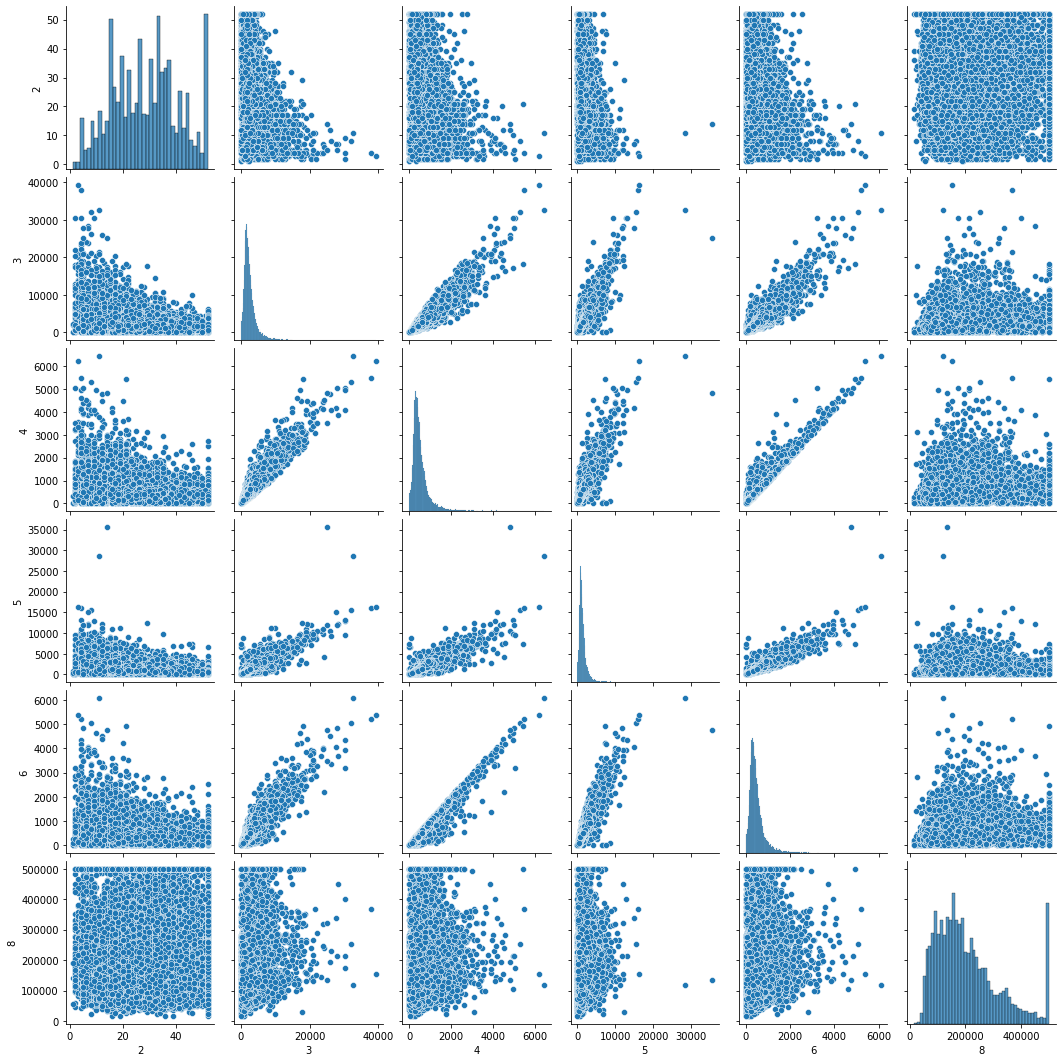

In [163]:
sns.pairplot(data)

<AxesSubplot:>

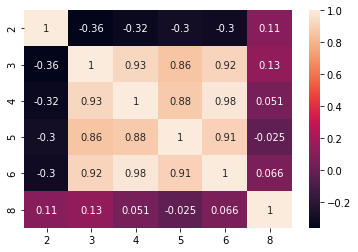

In [164]:
sns.heatmap(data.corr(),annot=True)

In [166]:
 x = data[['complexAge','totalRooms','totalBedrooms','complexInhabitants','apartmentsNr']]

In [167]:
y = data['medianCompexValue']

In [168]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.40,random_state=101)

In [169]:
from sklearn.linear_model import LinearRegression

In [170]:
lm = LinearRegression()

In [171]:
lm.fit(x_train,y_train)

LinearRegression()

In [172]:
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])

In [173]:
coeff_df

Coefficient
complexAge          1580.942212
totalRooms            45.949409
totalBedrooms       -307.039109
complexInhabitants   -75.262615
apartmentsNr         326.464554

In [174]:
predictions = lm.predict(x_test)

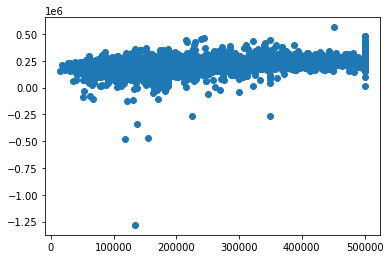

In [175]:
plt.scatter(y_test,predictions)

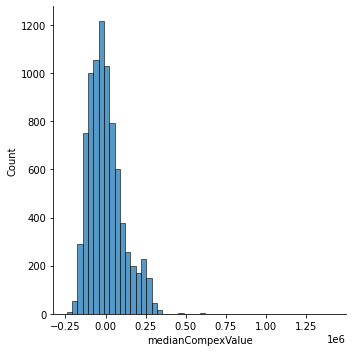

In [176]:
sns.displot((y_test-predictions),bins=50)

In [177]:
from sklearn.metrics import r2_score

In [178]:
score = r2_score(y_test,predictions)

In [179]:
print(score)

0.141490169974834


In [180]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,predictions)

In [181]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,predictions)

In [182]:
print(mean_absolute_error)

<function mean_absolute_error at 0x0000025A1A12E4C0>


In [183]:
print(mae)

83115.43712906119


In [184]:
print(mse)

11534009199.421799


# With column 1 2 and 8


In [203]:
data = pd.read_csv('apartmentComplexData.txt', sep=",", header=None)

In [204]:
data.isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

In [205]:
print('Let\'s check for null values\n')
print(data.isnull().sum())

Let's check for null values

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64


In [206]:
data.columns = ['column1','column2','complexAge','totalRooms','totalBedrooms','complexInhabitants','apartmentsNr','column8','medianCompexValue']

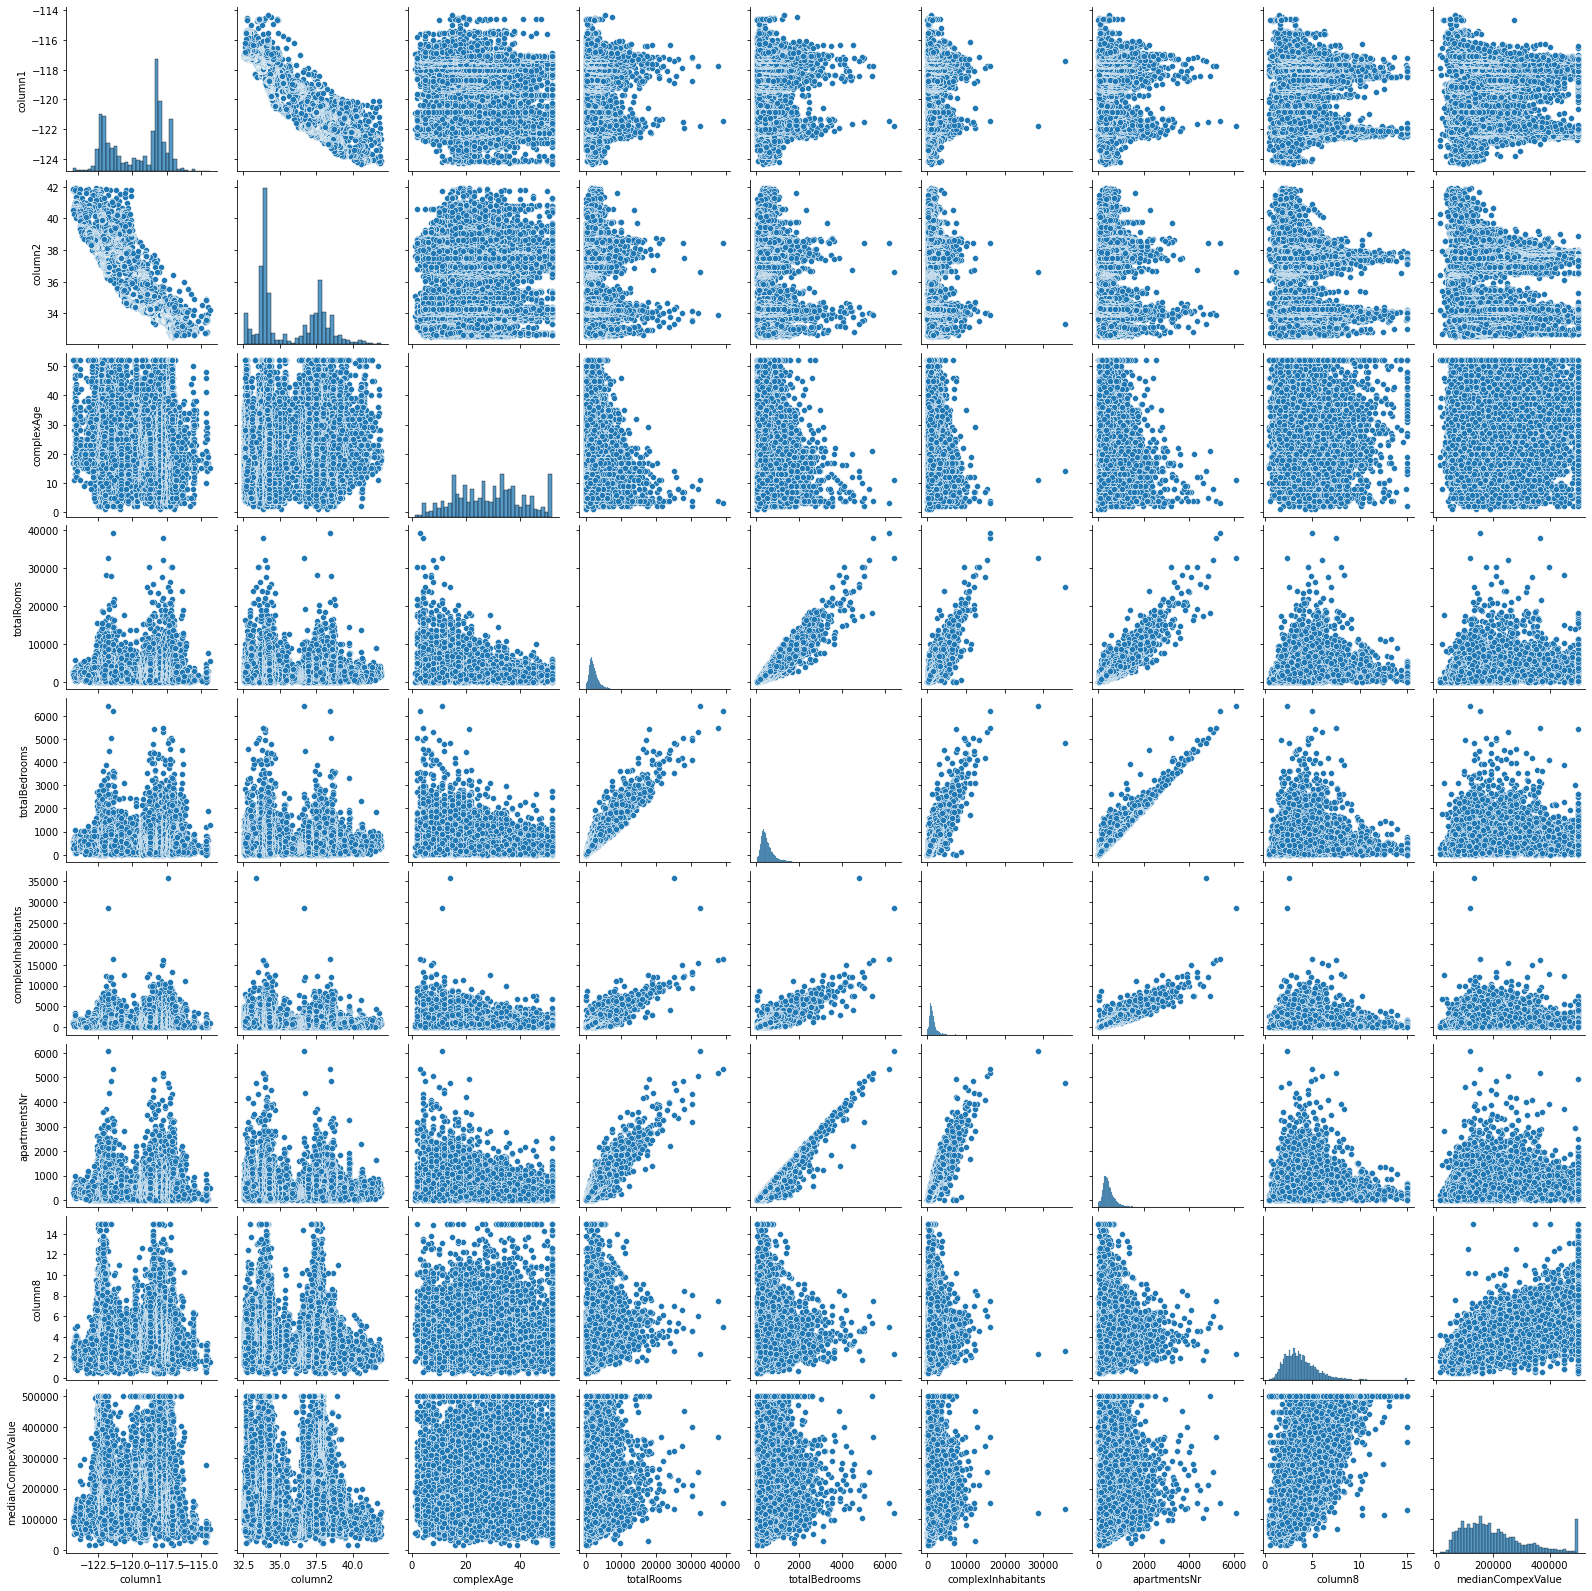

In [207]:
sns.pairplot(data)

<AxesSubplot:>

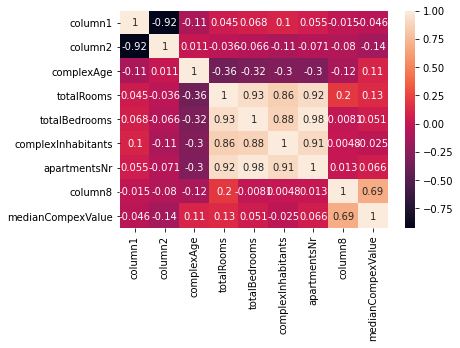

In [208]:
sns.heatmap(data.corr(),annot=True)

In [209]:
 x = data[['column1','column2','complexAge','totalRooms','totalBedrooms','complexInhabitants','apartmentsNr','column8']]

In [210]:
y = data['medianCompexValue']

In [211]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.40,random_state=42)

In [212]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [213]:
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])

In [214]:
coeff_df

Coefficient
column1            -42807.491044
column2            -42473.119447
complexAge           1143.492169
totalRooms             -8.638465
totalBedrooms         125.329063
complexInhabitants    -38.058054
apartmentsNr           36.754227
column8             40495.602432

In [215]:
predictions = lm.predict(x_test)

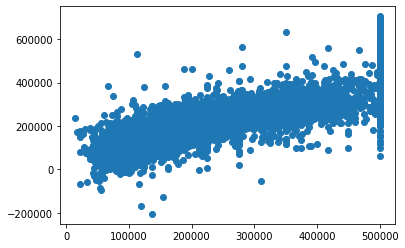

In [216]:
plt.scatter(y_test,predictions)

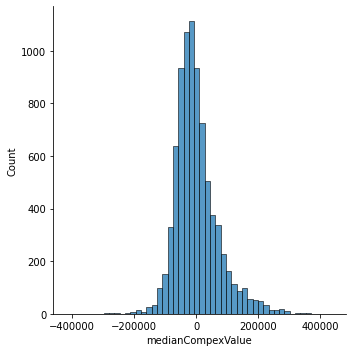

In [217]:
sns.displot((y_test-predictions),bins=50)

In [218]:
from sklearn.metrics import r2_score
score = r2_score(y_test,predictions)
print(score)

0.6339982835625284


In [219]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,predictions)
print(mse)

4899683595.785591


In [220]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,predictions)
print(mae)

51225.182147101106


# Normalize

In [186]:
data = pd.read_csv('apartmentComplexData.txt', sep=",", header=None)

In [187]:
from sklearn import preprocessing
import pandas as pd
data_normalize = preprocessing.normalize(data, axis=0)
data = pd.DataFrame(data_normalize)
data.head()

0         1         2         3         4         5         6  \
0 -0.007114  0.007386  0.009123  0.001790  0.001314  0.001231  0.001394   
1 -0.007114  0.007383  0.004673  0.014442  0.011268  0.009180  0.012592   
2 -0.007115  0.007381  0.011570  0.002984  0.001936  0.001896  0.001959   
3 -0.007116  0.007381  0.011570  0.002592  0.002394  0.002133  0.002423   
4 -0.007116  0.007381  0.011570  0.003310  0.002853  0.002160  0.002866   

          7         8  
0  0.013440  0.013300  
1  0.013401  0.010535  
2  0.011716  0.010347  
3  0.009110  0.010030  
4  0.006209  0.010056

In [188]:
data.columns = ['column1','column2','complexAge','totalRooms','totalBedrooms','complexInhabitants','apartmentsNr','column8','medianCompexValue']

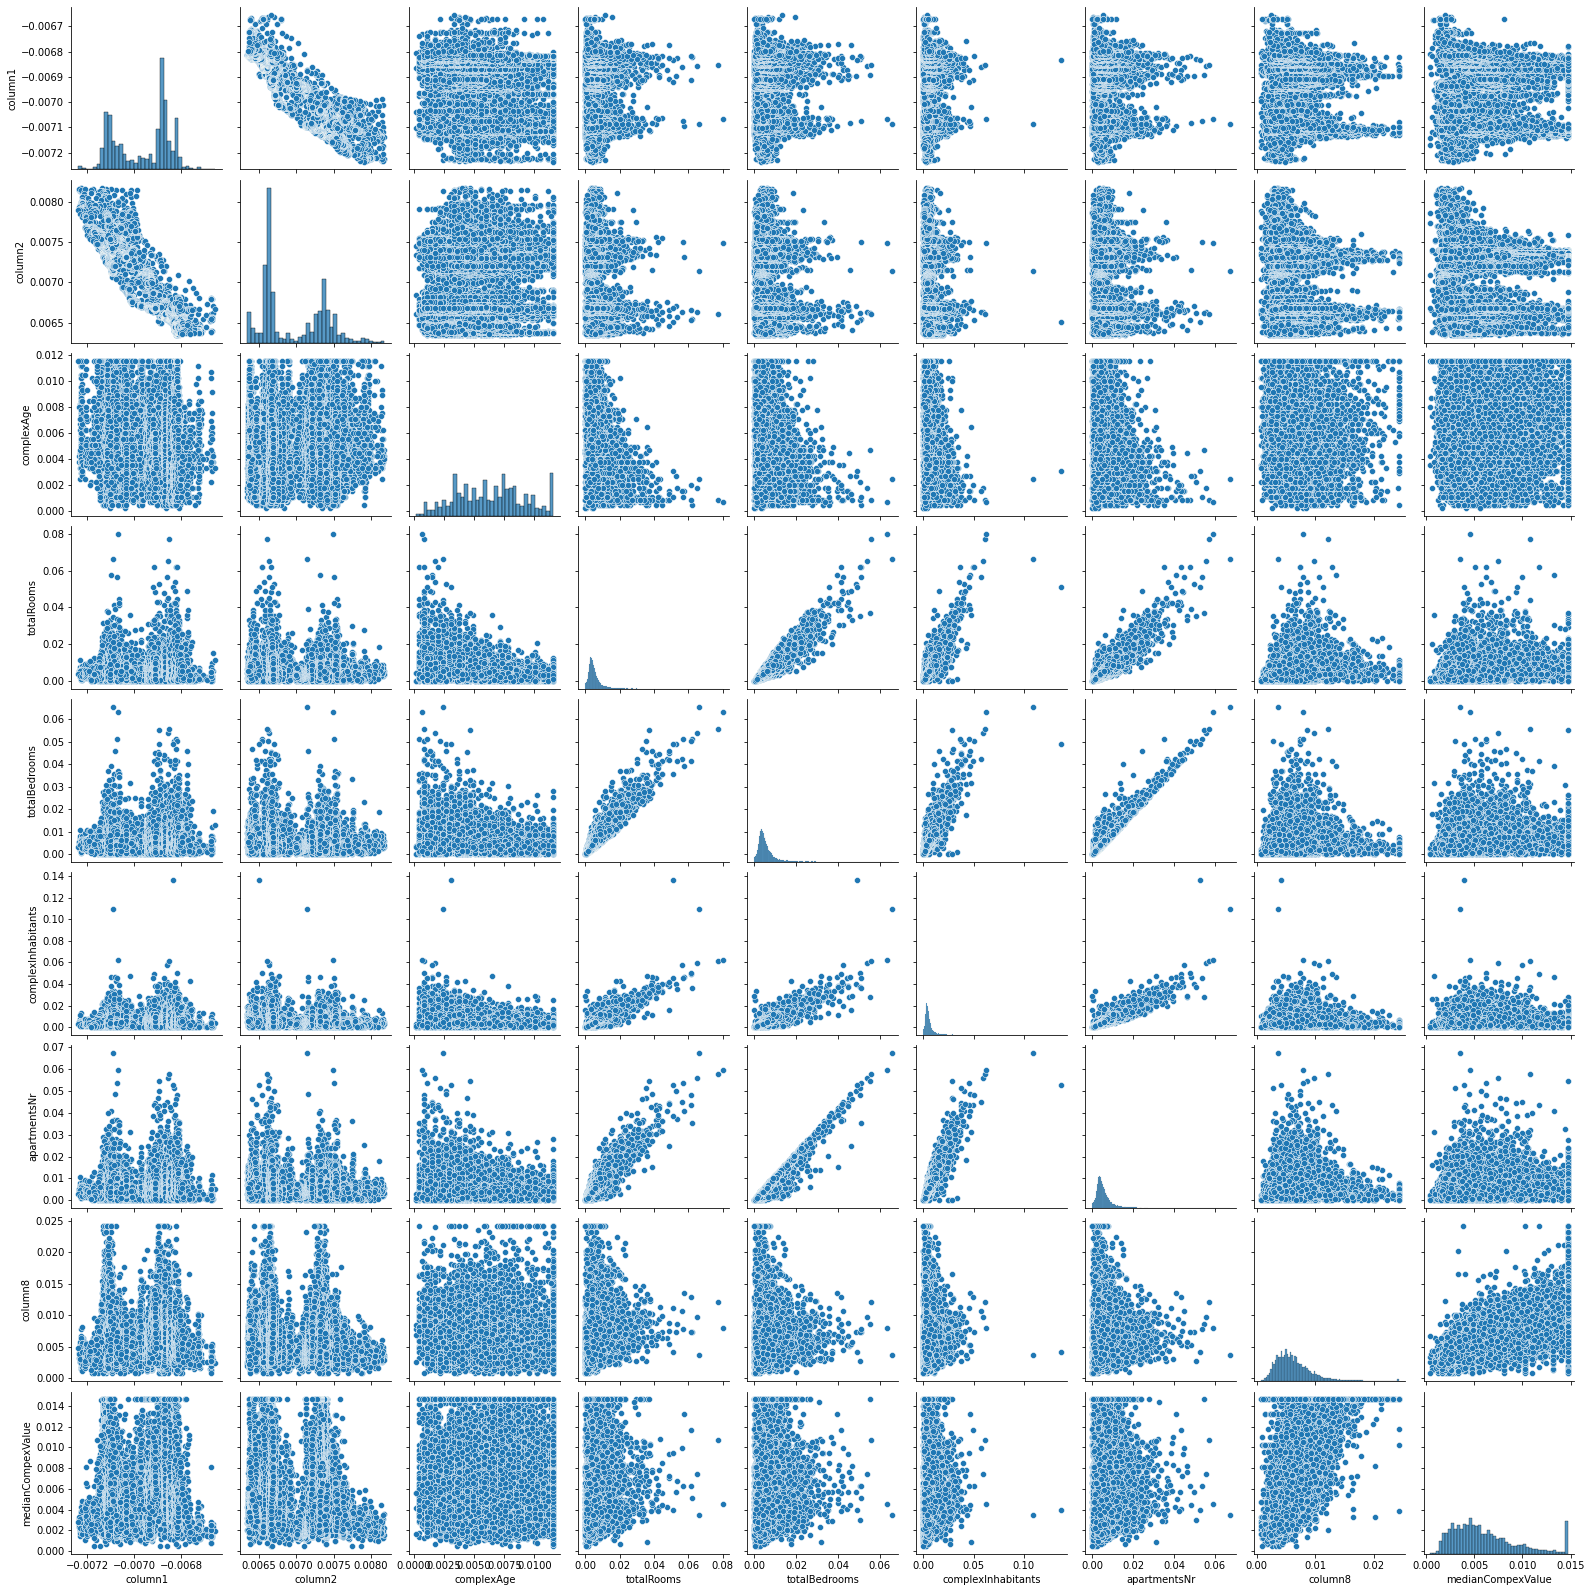

In [189]:
sns.pairplot(data)

<AxesSubplot:>

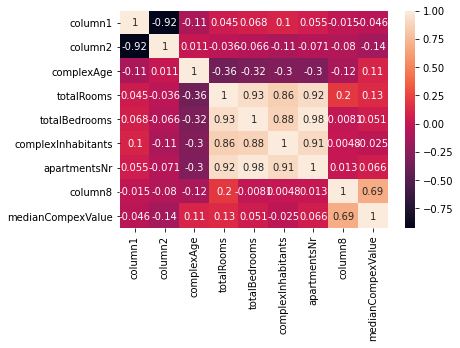

In [190]:
sns.heatmap(data.corr(),annot=True)

In [191]:
 x = data[['column1','column2','complexAge','totalRooms','totalBedrooms','complexInhabitants','apartmentsNr','column8']]

In [192]:
y = data['medianCompexValue']

In [193]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.40,random_state=42)

In [194]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [195]:
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])

In [196]:
coeff_df

Coefficient
column1              -21.612338
column2               -6.400758
complexAge             0.151021
totalRooms            -0.124781
totalBedrooms          0.361498
complexInhabitants    -0.292515
apartmentsNr           0.097610
column8                0.737160

In [197]:
predictions = lm.predict(x_test)

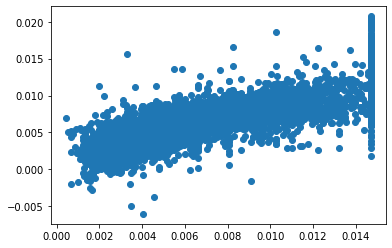

In [198]:
plt.scatter(y_test,predictions)

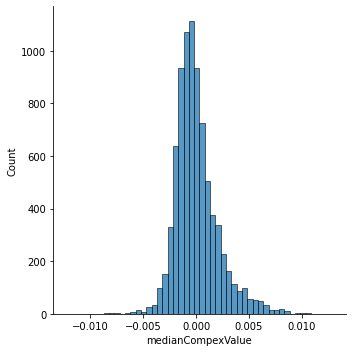

In [199]:
sns.displot((y_test-predictions),bins=50)

In [200]:
from sklearn.metrics import r2_score
score = r2_score(y_test,predictions)
print(score)

0.6339982835625277


In [201]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,predictions)
print(mse)

4.231146635578454e-06


In [202]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,predictions)
print(mae)

0.001505318960093658


# Standardize 

In [234]:
data = pd.read_csv('apartmentComplexData.txt', sep=",", header=None)

In [235]:
scaler = preprocessing.StandardScaler()

In [236]:
scaled_df = scaler.fit_transform(data)

In [237]:
data.columns = ['column1','column2','complexAge','totalRooms','totalBedrooms','complexInhabitants','apartmentsNr','column8','medianCompexValue']

In [238]:
names = data.columns

In [239]:
scaled_df = pd.DataFrame(scaled_df, columns=names)

In [240]:
print(scaled_df)

        column1   column2  complexAge  totalRooms  totalBedrooms  \
0     -1.327835  1.052548    0.982143   -0.804819      -0.970706   
1     -1.322844  1.043185   -0.607019    2.045890       1.348649   
2     -1.332827  1.038503    1.856182   -0.535746      -0.825895   
3     -1.337818  1.038503    1.856182   -0.624215      -0.719067   
4     -1.337818  1.038503    1.856182   -0.462404      -0.612239   
...         ...       ...         ...         ...            ...   
20635 -0.758826  1.801647   -0.289187   -0.444985      -0.389087   
20636 -0.818722  1.806329   -0.845393   -0.888704      -0.920853   
20637 -0.823713  1.778237   -0.924851   -0.174995      -0.125578   
20638 -0.873626  1.778237   -0.845393   -0.355600      -0.305998   
20639 -0.833696  1.750146   -1.004309    0.068408       0.185411   

       complexInhabitants  apartmentsNr   column8  medianCompexValue  
0               -0.974429     -0.977033  2.344766           2.129631  
1                0.861439      1.669961  

In [241]:
 x = scaled_df[['column1','column2','complexAge','totalRooms','totalBedrooms','complexInhabitants','apartmentsNr','column8']]

In [242]:
y = scaled_df['medianCompexValue']

In [243]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.40,random_state=101)

In [244]:
lm_scaled = LinearRegression()

In [245]:
lm_scaled.fit(x_train,y_train)

LinearRegression()

In [246]:
coeff_df = pd.DataFrame(lm_scaled.coef_,x.columns,columns=['Coefficient'])

In [247]:
coeff_df


Coefficient
column1               -0.761085
column2               -0.808082
complexAge             0.128313
totalRooms            -0.116013
totalBedrooms          0.368139
complexInhabitants    -0.440218
apartmentsNr           0.223535
column8                0.651933

In [248]:
predictions = lm_scaled.predict(x_test)

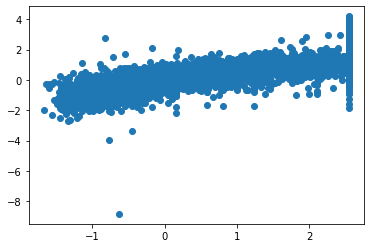

In [249]:
plt.scatter(y_test,predictions)

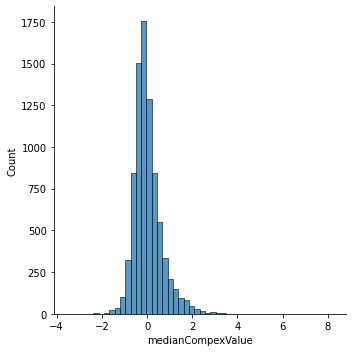

In [250]:
sns.displot((y_test-predictions),bins=50)

In [251]:
score = r2_score(y_test,predictions)

In [255]:
print(score)

0.6222045791048407


In [253]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,predictions)
print(mse)


0.3811835357448714


In [254]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,predictions)
print(mae)

0.44649484215514085
